<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana13/AjustesPoissonHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial

In [2]:
def Likelihood(mu,n,b,s):

  l = mu*s+b

  return np.exp(-l)*l**n/factorial(n)

In [3]:
n = np.array([1.,1])
b = np.array([0.,0])
s = np.array([1.,1])

In [8]:
def JointLikelihood(mu,n,b,s):

  Joint = 1.

  for i in range(len(n)):
    Joint *= Likelihood(mu,n[i],b[i],s[i])

  return Joint

In [11]:
mu = np.linspace(0,5,50)
JointLike = JointLikelihood(mu,n,b,s)

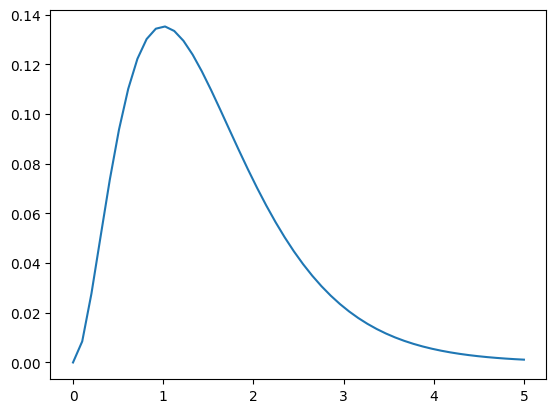

In [12]:
plt.plot(mu,JointLike)

In [13]:
probx = integrate.quad(JointLikelihood,0,np.inf,args=(n,b,s))[0]
probx

0.25000000000000006

In [14]:
Posterior = JointLikelihood(mu,n,b,s)/probx

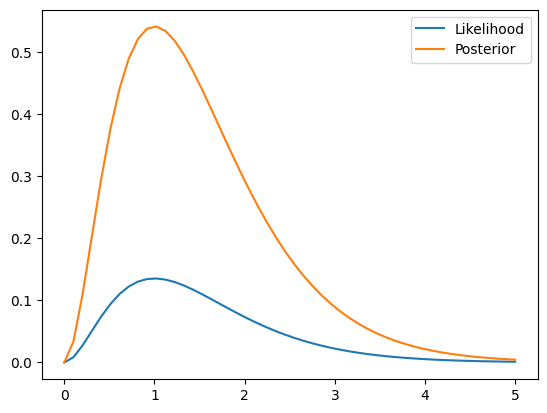

In [15]:
plt.plot(mu,JointLike,label='Likelihood')
plt.plot(mu,Posterior,label='Posterior')
plt.legend()

In [19]:
integrate.quad(JointLikelihood,3.2,np.inf,args=(n,b,s))[0]/probx

0.046324216776089305

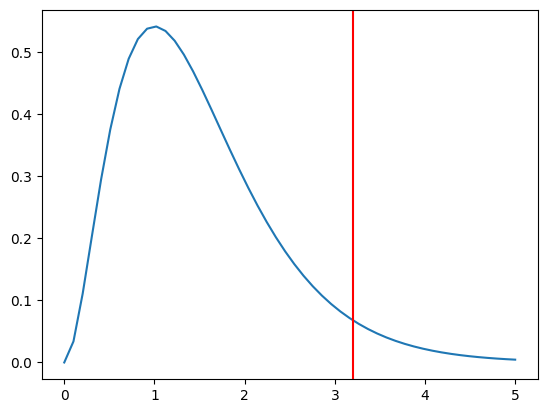

In [20]:
plt.plot(mu,Posterior,label='Posterior')
plt.axvline(x=3.2,color='r')